# VacationPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os

# Import API key
from api_keys import g_key

### Store Part I results into DataFrame
* Load the csv exported in Part I to a DataFrame

In [2]:
csv_path = "../WeatherPy/clean_weather_data.csv"

# Read Purchasing File and store into Pandas data frame
Vacation_df = pd.read_csv(csv_path)
Vacation_df=Vacation_df.drop(columns=['Unnamed: 0'])
Vacation_df

,city,lat,lng,max temp,Humidity,Cloudiness,Wind Speed,country
0,Bethel,41.37,-73.41,75.99,38,1,10.29,US
1,Kayerkan,69.35,87.76,44.60,100,90,11.18,RU
2,Busselton,-33.65,115.33,39.00,77,0,3.94,AU
3,Butaritari,3.07,172.79,83.19,70,13,10.96,KI
4,Sola,-13.88,167.55,82.40,78,75,9.17,VU
...,...,...,...,...,...,...,...,...
556,Henties Bay,-22.12,14.28,53.01,80,0,5.84,NaN
557,Bambuí,-20.01,-45.98,71.58,42,52,2.46,BR
558,Soyo,-6.13,12.37,71.37,84,8,7.85,AO
559,Raudeberg,61.99,5.14,51.01,79,0,13.02,NO


### Humidity Heatmap
* Configure gmaps.
* Use the Lat and Lng as locations and Humidity as the weight.
* Add Heatmap layer to map.

In [3]:
gmaps.configure(api_key=g_key)

# Store 'Lat' and 'Lng' into  locations 
locations = Vacation_df[['lat', 'lng']].astype(float)
Humidity = Vacation_df["Humidity"].astype(float)

fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations=locations, weights=Humidity*2, max_intensity=100)
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

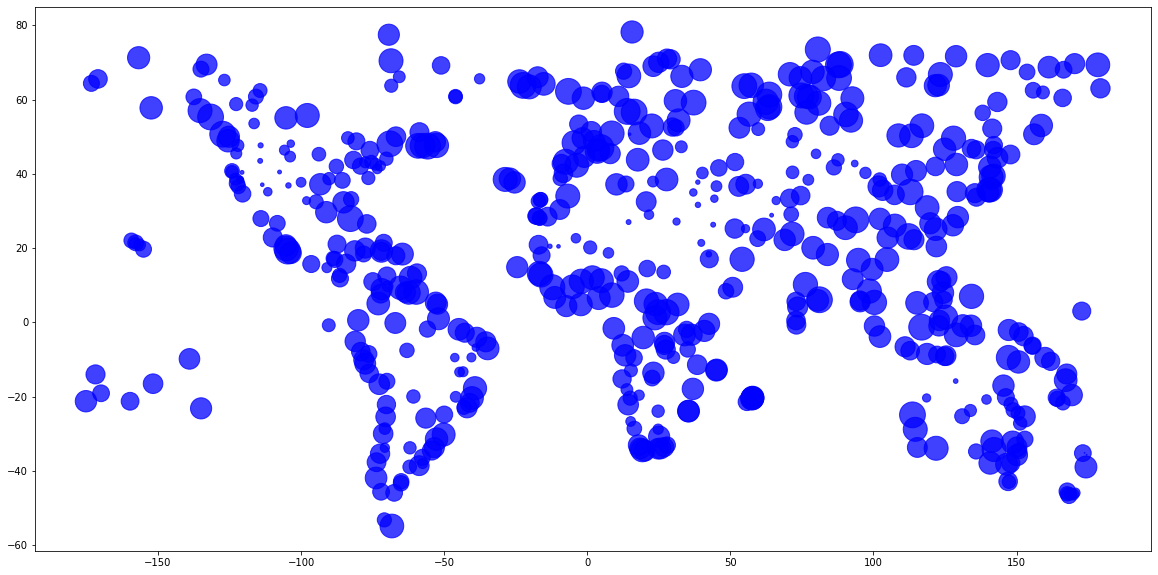

In [4]:
x_axis=Vacation_df['lng']
y_axis=Vacation_df['lat']
data=Vacation_df['Humidity']

plt.figure(figsize=(20,10))
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", alpha=0.75, s=data*data/15, cmap=('YlGnBu'))

plt.show()

### Create new DataFrame fitting weather criteria
* Narrow down the cities to fit weather conditions.
* Drop any rows will null values.

In [5]:
paradice=(Vacation_df.loc[:, 'max temp']<90) & (Vacation_df.loc[:, 'max temp']>70) & (Vacation_df.loc[:, 'Wind Speed']>10)
# paradice
paradice_df=Vacation_df[paradice]
paradice_df

,city,lat,lng,max temp,Humidity,Cloudiness,Wind Speed,country
0,Bethel,41.37,-73.41,75.99,38,1,10.29,US
3,Butaritari,3.07,172.79,83.19,70,13,10.96,KI
12,Faanui,-16.48,-151.75,77.23,76,37,21.77,PF
21,Vaini,-21.20,-175.20,78.80,83,75,16.11,TO
27,Healdsburg,38.61,-122.87,82.99,47,1,10.29,US
...,...,...,...,...,...,...,...,...
548,Quryq,43.20,51.65,72.46,67,26,10.36,KZ
549,Bitung,1.45,125.18,75.20,94,20,10.78,ID
551,Barreirinhas,-2.75,-42.83,80.04,74,4,13.04,BR
554,Alofi,-19.06,-169.92,80.60,65,75,13.87,NU


### Hotel Map
* Store into variable named `hotel_df`.
* Add a "Hotel Name" column to the DataFrame.
* Set parameters to search for hotels with 5000 meters.
* Hit the Google Places API for each city's coordinates.
* Store the first Hotel result into the DataFrame.
* Plot markers on top of the heatmap.

In [6]:
target_search = "hotel"
target_radius = 5000
target_type = "lodging"

# set up a parameters dictionary
params = {
    "keyword": target_search,
    "types": target_type,
    "radius": target_radius,
    "key": g_key
        }
# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
count=1

# run a request using our params dictionary
for i, row in paradice_df.iterrows():
    try:
        params['location']=f"{row['lat']},{row['lng']}"
        response=requests.get(base_url, params=params)
        hotel_data=response.json()
        hotel_name=hotel_data["results"][0]["name"]
        paradice_df.loc[i, 'Hotel name']=hotel_name
        print(f"processing record {count} - {row['city']}")
        count = count+1
    except:
        print(f"problem processing {row['city']}.  skipping. ")
        count = count +1
print('Complete')
              

C:\Users\phill\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\phill\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


processing record 1 - Bethel
problem processing Butaritari.  skipping. 
processing record 3 - Faanui
processing record 4 - Vaini
processing record 5 - Healdsburg
processing record 6 - Kapaa
processing record 7 - Kahului
processing record 8 - Camacha
processing record 9 - Puerto Ayora
processing record 10 - Ahmadpur East
problem processing Mayor Pablo Lagerenza.  skipping. 
problem processing El Tocuyo.  skipping. 
processing record 13 - São Filipe
processing record 14 - Hithadhoo
processing record 15 - Monticello
processing record 16 - Avarua
processing record 17 - Inhambane
processing record 18 - Kavieng
processing record 19 - Atuona
processing record 20 - Lamu
problem processing Lotofaga.  skipping. 
processing record 22 - Palmer
processing record 23 - Santa Cruz de La Palma
processing record 24 - Bambous Virieux
processing record 25 - San Patricio
processing record 26 - Sabang
processing record 27 - Nouadhibou
processing record 28 - Muisne
processing record 29 - Maxixe
processing re

In [8]:
paradice_df.rename(columns={'Hotel name': 'Hotel Name', 'city': 'City', 'country': 'Country'}, inplace=True)
paradice_df.head(10)


C:\Users\phill\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,City,lat,lng,max temp,Humidity,Cloudiness,Wind Speed,Country,Hotel Name
0,Bethel,41.37,-73.41,75.99,38,1,10.29,US,Courtyard by Marriott Danbury
3,Butaritari,3.07,172.79,83.19,70,13,10.96,KI,NaN
12,Faanui,-16.48,-151.75,77.23,76,37,21.77,PF,InterContinental Bora Bora Resort Thalasso Spa
21,Vaini,-21.20,-175.20,78.80,83,75,16.11,TO,Paradise First Hotel
27,Healdsburg,38.61,-122.87,82.99,47,1,10.29,US,Best Western Dry Creek Inn
32,Kapaa,22.08,-159.32,84.99,58,20,17.22,US,Hilton Garden Inn Kauai Wailua Bay
33,Kahului,20.89,-156.47,89.60,46,40,19.46,US,Maui Beach Hotel
34,Camacha,33.08,-16.33,71.60,56,75,12.75,PT,Pestana Porto Santo
39,Puerto Ayora,-0.74,-90.35,78.80,50,100,20.80,EC,Finch Bay Galapagos Hotel
51,Ahmadpur East,29.14,71.26,88.47,57,61,11.14,PK,New Balochistann Hotel


In [9]:
# NOTE: Do not change any of the code in this cell

# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{Hotel Name}</dd>
<dt>C</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
hotel_info = [info_box_template.format(**row) for index, row in paradice_df.iterrows()]
locations = paradice_df[["lat", "lng"]]

In [10]:
# Add marker layer ontop of heat map
marker_layer=gmaps.marker_layer(locations, info_box_template)
fig.add_layer(marker_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))